## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

print(f"shape of train_df: {train_df.shape}")
print(f"shape of test_df: {test_df.shape}")

print("train_df")
display(train_df.head())
print("test_df")
display(test_df.head())

shape of train_df: (60000, 785)
shape of test_df: (10000, 784)
train_df


,label,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
index,,,,,,,,,,,,,,,,,,,,,
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


test_df


,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 785 entries, label to px784
dtypes: int64(785)
memory usage: 359.8 MB


In [ ]:
train_df.describe()

,label,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Columns: 784 entries, px1 to px784
dtypes: int64(784)
memory usage: 59.9 MB


In [ ]:
test_df.describe()

,px1,px2,px3,px4,px5,px6,px7,px8,px9,px10,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 결측치는 존재하지 않습니다
def check_missing_col(dataframe):
  missing_col = []
  counted_missing_col = 0
  for i, col in enumerate(dataframe.columns):
    missing_values = sum(dataframe[col].isna())
    is_missing = True if missing_values >= 1 else False
    if is_missing:
      counted_missing_col += 1
      print(f'결측치가 있는 컬럼은: {col}입니다.')
      print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
      missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
      print('결측치가 존재하지 않습니다.')
    return missing_col 

In [ ]:
print("missing_col of train_df")
print(check_missing_col(train_df))
print("missing_col of test_df")
print(check_missing_col(test_df))

missing_col of train_df
결측치가 존재하지 않습니다.
[]
missing_col of test_df
결측치가 존재하지 않습니다.
[]


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64


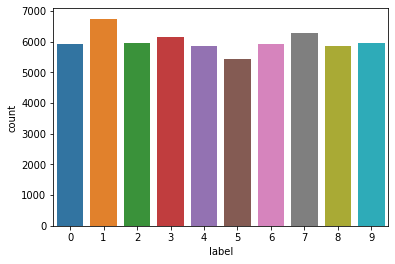

In [ ]:
# 1과 7이 다른 숫자에 비해서 많기는 하지만 심각한 정도는 아닌 것 같다.
# 따로 불균형 데이터 처리는 해주지 않기로 한다.
print(train_df.label.value_counts())
sns.countplot(x='label', data=train_df)
plt.show()

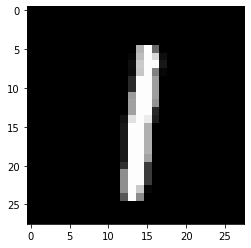

In [ ]:
img = np.array(train_df.iloc[40,1:],dtype = 'float32').reshape((28,28))
plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
# 변수가 너무 많기도 하고, 각각의 변수가 무엇을 의미하는 지도 알기 때문에 분포를 살펴보는 것은 생략합니다.

## 모델 사용하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

### MLP

In [ ]:
X_train = train_df.drop("label", axis=1)
y_train = train_df[['label']]

X_test = test_df

In [ ]:
X_train = np.array(X_train.astype('float32')/255.0)
X_test = np.array(X_test.astype('float32')/255.0)

In [ ]:
y_train = keras.utils.to_categorical(y_train,10)

In [ ]:
mlp1 = Sequential(name='mlp1')
mlp1.add(Dense(units=1024, input_dim=(28*28), activation='relu', name='hidden1'))
mlp1.add(Dropout(0.25, name='dropout1'))
mlp1.add(Dense(units=256, activation='relu', name='hidden2'))
mlp1.add(Dropout(0.25, name='dropout2'))
mlp1.add(Dense(units=64, activation='relu', name='hidden3'))
mlp1.add(Dropout(0.25, name='dropout3'))
mlp1.add(Dense(units=10, activation='softmax', name='output'))

mlp1.summary()

Model: "mlp1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 1024)              803840    
                                                                 
 dropout1 (Dropout)          (None, 1024)              0         
                                                                 
 hidden2 (Dense)             (None, 256)               262400    
                                                                 
 dropout2 (Dropout)          (None, 256)               0         
                                                                 
 hidden3 (Dense)             (None, 64)                16448     
                                                                 
 dropout3 (Dropout)          (None, 64)                0         
                                                                 
 output (Dense)              (None, 10)                650    

In [ ]:
mlp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
mc = ModelCheckpoint(filepath='mlp1_best.h5', monitor='val_accuracy', save_best_only=10)

In [ ]:
history = mlp1.fit(X_train, y_train, epochs=100, batch_size=64,
                   validation_split=0.2, callbacks=[es,mc])

Epoch 1/100
750/750 [==============================] - 8s 6ms/step - loss: 0.3235 - accuracy: 0.9047 - val_loss: 0.1454 - val_accuracy: 0.9556
Epoch 2/100
750/750 [==============================] - 4s 6ms/step - loss: 0.1344 - accuracy: 0.9609 - val_loss: 0.1284 - val_accuracy: 0.9649
Epoch 3/100
750/750 [==============================] - 4s 6ms/step - loss: 0.1074 - accuracy: 0.9688 - val_loss: 0.0969 - val_accuracy: 0.9720
Epoch 4/100
750/750 [==============================] - 4s 6ms/step - loss: 0.0824 - accuracy: 0.9757 - val_loss: 0.0875 - val_accuracy: 0.9746
Epoch 5/100
750/750 [==============================] - 4s 6ms/step - loss: 0.0714 - accuracy: 0.9783 - val_loss: 0.0877 - val_accuracy: 0.9756
Epoch 6/100
750/750 [==============================] - 4s 6ms/step - loss: 0.0627 - accuracy: 0.9815 - val_loss: 0.0817 - val_accuracy: 0.9788
Epoch 7/100
750/750 [==============================] - 4s 6ms/step - loss: 0.0518 - accuracy: 0.9845 - val_loss: 0.0846 - val_accuracy: 0.9769

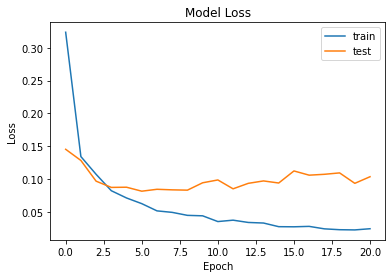

In [ ]:
def plt_show_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc=0)

plt_show_loss(history)
plt.show()

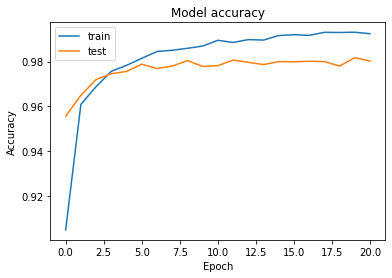

In [ ]:
def plt_show_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Model accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['train', 'test'], loc=0)

plt_show_acc(history)
plt.show()

### CNN(BatchNormalization X)

In [ ]:
X_train = train_df.drop("label", axis=1)
y_train = train_df[['label']]

X_test = test_df

In [ ]:
X_train = np.array(X_train.astype('float32')/255.0).reshape(-1,28,28,1)
X_test = np.array(X_test.astype('float32')/255.0).reshape(-1,28,28,1)

In [ ]:
y_train = keras.utils.to_categorical(y_train,10)

In [ ]:
cnn1 = Sequential(name='cnn1')
cnn1.add(Conv2D(64, (7,7), activation='elu', padding='same', input_shape=[28,28,1], name='conv1'))
cnn1.add(MaxPooling2D((2,2), name='pooling1'))
cnn1.add(Conv2D(128,(3,3), activation='elu', padding='same', name='conv2_1'))
cnn1.add(Conv2D(128,(3,3), activation='elu', padding='same', name='conv2_2'))
cnn1.add(MaxPooling2D((2,2), name='pooling2'))
cnn1.add(Conv2D(256,(3,3), activation='elu', padding='same', name='conv3_1'))
cnn1.add(Conv2D(256,(3,3), activation='elu', padding='same', name='conv3_2'))
cnn1.add(MaxPooling2D((2,2), name='pooling3'))

cnn1.add(GlobalAveragePooling2D(name='global'))
cnn1.add(Dense(256, activation='relu', name='dense1'))
cnn1.add(Dropout(0.25, name='dropout1'))
cnn1.add(Dense(64, activation='relu', name='dense2'))
cnn1.add(Dropout(0.25, name='dropout2'))
cnn1.add(Dense(10, activation='softmax', name='output'))

cnn1.summary()

Model: "cnn1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 64)        3200      
                                                                 
 pooling1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 conv2_1 (Conv2D)            (None, 14, 14, 128)       73856     
                                                                 
 conv2_2 (Conv2D)            (None, 14, 14, 128)       147584    
                                                                 
 pooling2 (MaxPooling2D)     (None, 7, 7, 128)         0         
                                                                 
 conv3_1 (Conv2D)            (None, 7, 7, 256)         295168    
                                                                 
 conv3_2 (Conv2D)            (None, 7, 7, 256)         590080 

In [ ]:
cnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
mc = ModelCheckpoint(filepath='cnn1_best.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
history2 = cnn1.fit(X_train, y_train, epochs=100, batch_size=64,
                   validation_split=0.2, callbacks=[es,mc])

Epoch 1/100
750/750 [==============================] - 29s 28ms/step - loss: 0.3263 - accuracy: 0.8979 - val_loss: 0.0870 - val_accuracy: 0.9758
Epoch 2/100
750/750 [==============================] - 20s 27ms/step - loss: 0.0977 - accuracy: 0.9730 - val_loss: 0.0564 - val_accuracy: 0.9845
Epoch 3/100
750/750 [==============================] - 20s 26ms/step - loss: 0.0703 - accuracy: 0.9813 - val_loss: 0.0487 - val_accuracy: 0.9867
Epoch 4/100
750/750 [==============================] - 20s 26ms/step - loss: 0.0574 - accuracy: 0.9841 - val_loss: 0.0508 - val_accuracy: 0.9858
Epoch 5/100
750/750 [==============================] - 20s 26ms/step - loss: 0.0478 - accuracy: 0.9867 - val_loss: 0.0504 - val_accuracy: 0.9863
Epoch 6/100
750/750 [==============================] - 20s 26ms/step - loss: 0.0421 - accuracy: 0.9880 - val_loss: 0.0503 - val_accuracy: 0.9871
Epoch 7/100
750/750 [==============================] - 20s 26ms/step - loss: 0.0445 - accuracy: 0.9883 - val_loss: 0.0375 - val_ac

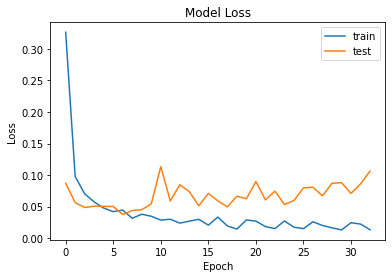

In [ ]:
plt_show_loss(history2)
plt.show()

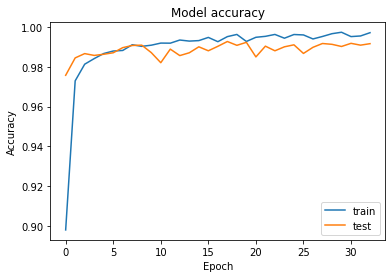

In [ ]:
plt_show_acc(history2)
plt.show()

### CNN(BatchNormalization O)

In [ ]:
cnn2 = Sequential(name='cnn1')
cnn2.add(Conv2D(64, (7,7), activation='elu', padding='same', input_shape=[28,28,1], name='conv1'))
cnn2.add(BatchNormalization(name='batch1'))
cnn2.add(MaxPooling2D((2,2), name='pooling1'))
cnn2.add(Conv2D(128,(3,3), activation='elu', padding='same', name='conv2_1'))
cnn2.add(Conv2D(128,(3,3), activation='elu', padding='same', name='conv2_2'))
cnn2.add(BatchNormalization(name='batch2'))
cnn2.add(MaxPooling2D((2,2), name='pooling2'))
cnn2.add(Conv2D(256,(3,3), activation='elu', padding='same', name='conv3_1'))
cnn2.add(Conv2D(256,(3,3), activation='elu', padding='same', name='conv3_2'))
cnn2.add(BatchNormalization(name='batch3'))
cnn2.add(MaxPooling2D((2,2), name='pooling3'))

cnn2.add(GlobalAveragePooling2D(name='global'))
cnn2.add(Dense(256, activation='relu', name='dense1'))
cnn2.add(Dropout(0.25, name='dropout1'))
cnn2.add(Dense(64, activation='relu', name='dense2'))
cnn2.add(Dropout(0.25, name='dropout2'))
cnn2.add(Dense(10, activation='softmax', name='output'))

cnn2.summary()

Model: "cnn1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 64)        3200      
                                                                 
 batch1 (BatchNormalization)  (None, 28, 28, 64)       256       
                                                                 
 pooling1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 conv2_1 (Conv2D)            (None, 14, 14, 128)       73856     
                                                                 
 conv2_2 (Conv2D)            (None, 14, 14, 128)       147584    
                                                                 
 batch2 (BatchNormalization)  (None, 14, 14, 128)      512       
                                                                 
 pooling2 (MaxPooling2D)     (None, 7, 7, 128)         0      

In [ ]:
cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
mc = ModelCheckpoint(filepath='cnn2_best.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
history3 = cnn2.fit(X_train, y_train, epochs=100, batch_size=64,
                   validation_split=0.2, callbacks=[es,mc])

Epoch 1/100
750/750 [==============================] - 23s 29ms/step - loss: 0.1852 - accuracy: 0.9456 - val_loss: 0.0874 - val_accuracy: 0.9756
Epoch 2/100
750/750 [==============================] - 21s 28ms/step - loss: 0.0631 - accuracy: 0.9829 - val_loss: 0.1097 - val_accuracy: 0.9705
Epoch 3/100
750/750 [==============================] - 21s 29ms/step - loss: 0.0448 - accuracy: 0.9876 - val_loss: 0.0682 - val_accuracy: 0.9820
Epoch 4/100
750/750 [==============================] - 21s 29ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0.0493 - val_accuracy: 0.9862
Epoch 5/100
750/750 [==============================] - 21s 28ms/step - loss: 0.0333 - accuracy: 0.9908 - val_loss: 0.0590 - val_accuracy: 0.9842
Epoch 6/100
750/750 [==============================] - 22s 29ms/step - loss: 0.0257 - accuracy: 0.9927 - val_loss: 0.0615 - val_accuracy: 0.9822
Epoch 7/100
750/750 [==============================] - 22s 30ms/step - loss: 0.0258 - accuracy: 0.9928 - val_loss: 0.0359 - val_ac

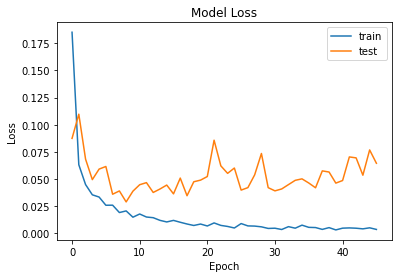

In [ ]:
plt_show_loss(history3)
plt.show()

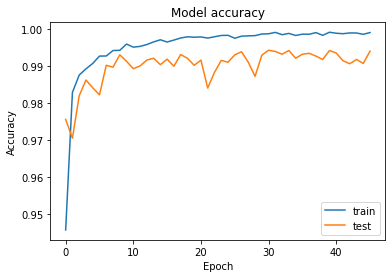

In [ ]:
plt_show_acc(history3)
plt.show()

## 제출 파일 만들기

In [ ]:
submission= pd.read_csv('sample_submission.csv')

In [ ]:
X_test = test_df
X_test = np.array(X_test.astype('float32')/255.0)
mlp1_preds = mlp1.predict(X_test)

In [ ]:
# cnn1은 배치정규화를 적용하지 않은 모델이고, cnn2는 배치정규화를 적용한 모델입니다.
X_test = test_df
X_test = np.array(X_test.astype('float32')/255.0).reshape(-1,28,28,1)
cnn1_preds = cnn1.predict(X_test)
cnn2_preds = cnn2.predict(X_test)

In [ ]:
mlp1_predictions = np.argmax(mlp1_preds, axis=1)
cnn1_predictions = np.argmax(cnn1_preds, axis=1)
cnn2_predictions = np.argmax(cnn2_preds, axis=1)

In [ ]:
submission['label'] = mlp1_predictions
submission.to_csv('mlp1_2.csv', index=False)
submission.label.value_counts()

1    1148
2    1038
7    1019
3    1002
8     992
0     987
9     982
4     977
6     957
5     898
Name: label, dtype: int64

In [ ]:
submission['label'] = cnn1_predictions
submission.to_csv('cnn1_2.csv', index=False)
submission.label.value_counts()

1    1144
2    1028
7    1024
3    1016
9    1006
0     985
4     985
8     975
6     933
5     904
Name: label, dtype: int64

In [ ]:
submission['label'] = cnn2_predictions
submission.to_csv('cnn2_2.csv', index=False)
submission.label.value_counts()

1    1139
2    1038
7    1026
3    1005
9     997
4     988
0     987
8     969
6     942
5     909
Name: label, dtype: int64